In [1]:
import pandas as pd

df = pd.read_csv("Trips_2018.csv")

In [3]:
import os

#count cpu cores
cores = os.cpu_count()
print(cores)

16


In [2]:
from sklearn.preprocessing import LabelEncoder


In [2]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
print(df.dtypes)

Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object


In [3]:
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')

In [4]:
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')

In [7]:
print(df.dtypes)

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
dtype: object


In [8]:
print(df['usertype'].unique())

['Subscriber' 'Customer']


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['usertype'] = label_encoder.fit_transform(df['usertype'])

In [8]:
print(df['gender'].unique())

[1 0 2]


In [ ]:
from sklearn.cluster import KMeans
#!setx LOKY_Min_CPU_COUNT 6

distortions = []
K = range(1, 25) 

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['start_station_latitude', 'start_station_longitude']])
    distortions.append(kmeanModel.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X =df[['start_station_latitude', 'start_station_longitude']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,25))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\spbsp\anaconda3\envs\env1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


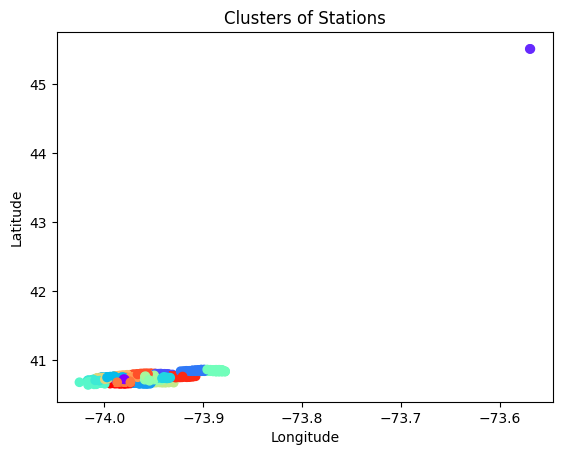

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()

kmeans = KMeans(n_clusters=20, random_state=0).fit(stations[['start_station_latitude', 'start_station_longitude']])
stations['cluster'] = kmeans.labels_

plt.scatter(stations['start_station_longitude'], stations['start_station_latitude'], c=stations['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Stations')
plt.show()

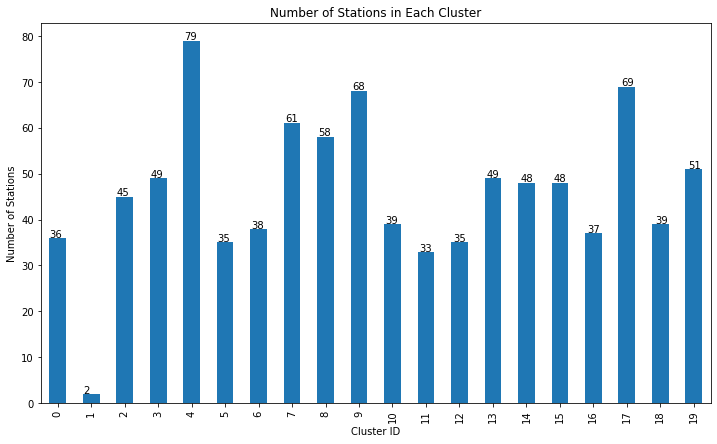

In [22]:
cluster_counts = stations.groupby('cluster').size()

ax = cluster_counts.plot(kind='bar', figsize=(12,7))
plt.xlabel('Cluster ID')
plt.ylabel('Number of Stations')
plt.title('Number of Stations in Each Cluster')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


In [32]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

        start_station_id  start_station_latitude  start_station_longitude  \
676612            3488.0               45.506364               -73.569463   
714485            3650.0               45.506264               -73.568906   

        cluster  
676612        1  
714485        1  


These 2 stations are located in Montreal, Canada. Therefore, they will be discarded.

In [33]:
stations = stations[stations['cluster'] != 1]

In [34]:
stations.head()

,start_station_id,start_station_latitude,start_station_longitude,cluster
0,72.0,40.767272,-73.993929,4
1324,79.0,40.719116,-74.006667,7
2430,82.0,40.711174,-74.000165,7
2866,83.0,40.683826,-73.976323,18
3551,119.0,40.696089,-73.978034,18


In [35]:
cluster_1_stations = stations[stations['cluster'] == 1]
print(cluster_1_stations)

Empty DataFrame
Columns: [start_station_id, start_station_latitude, start_station_longitude, cluster]
Index: []


In [39]:
merged_df = df.merge(stations[['start_station_id', 'cluster']], on='start_station_id', how='left')

merged_df.head(300)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,4.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,4.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,4.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,4.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,4.0
5,5,1602,2018-01-01 21:31:54.192,2018-01-01 21:58:36.353,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,1,1968,1,4.0
6,6,722,2018-01-02 07:54:53.646,2018-01-02 08:06:55.872,72.0,40.767272,-73.993929,228.0,40.754601,-73.971879,32059,1,1978,1,4.0
7,7,434,2018-01-02 08:06:14.331,2018-01-02 08:13:28.767,72.0,40.767272,-73.993929,173.0,40.760683,-73.984527,30525,1,1983,1,4.0
8,8,366,2018-01-02 08:10:15.255,2018-01-02 08:16:21.896,72.0,40.767272,-73.993929,479.0,40.760193,-73.991255,27439,1,1974,1,4.0
9,9,324,2018-01-02 08:13:30.896,2018-01-02 08:18:55.120,72.0,40.767272,-73.993929,450.0,40.762272,-73.987882,30892,1,1947,1,4.0


In [40]:
merged_df.head(300)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,cluster
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1992,1,4.0
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1969,1,4.0
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1956,1,4.0
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1974,1,4.0
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1992,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,790,2018-01-11 10:38:44.796,2018-01-11 10:51:54.996,72.0,40.767272,-73.993929,441.0,40.756014,-73.967416,17694,1,1987,2,4.0
296,296,768,2018-01-11 10:46:09.911,2018-01-11 10:58:58.077,72.0,40.767272,-73.993929,359.0,40.755103,-73.974987,30798,1,1992,1,4.0
297,297,1378,2018-01-11 11:13:37.024,2018-01-11 11:36:35.187,72.0,40.767272,-73.993929,3256.0,40.727714,-74.011296,30440,1,1978,1,4.0
298,298,291,2018-01-11 11:59:57.202,2018-01-11 12:04:49.054,72.0,40.767272,-73.993929,478.0,40.760301,-73.998842,17204,1,1964,1,4.0
